In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [13]:
my_data = pd.read_csv("placement-data.csv")

In [14]:
#my_data = pd.read_csv("result_data.csv")

In [15]:
my_data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [33]:
my_data.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [34]:
my_data.dtypes

StudentID                      int64
CGPA                         float64
Internships                    int64
Projects                       int64
Workshops/Certifications       int64
AptitudeTestScore              int64
SoftSkillsRating             float64
ExtracurricularActivities     object
PlacementTraining             object
SSC_Marks                      int64
HSC_Marks                      int64
PlacementStatus               object
dtype: object

In [35]:
my_data.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [36]:
my_data.shape

(10000, 12)

In [37]:
print(f'Number of rows:{my_data.shape[0]}')
print(f'Number of columns:{my_data.shape[1]}')

Number of rows:10000
Number of columns:12


In [38]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [39]:
my_data.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

#### So until now we have done data analysis and found no need for preprocessing as there are no null values and no redundant columns.

In [40]:
my_data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [41]:
my_data['PlacementStatus'].unique()

array(['NotPlaced', 'Placed'], dtype=object)

In [42]:
my_data['ExtracurricularActivities'].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
my_data['PlacementTraining'].unique()

array(['No', 'Yes'], dtype=object)

In [44]:
my_data['PlacementStatus'].value_counts()

NotPlaced    5803
Placed       4197
Name: PlacementStatus, dtype: int64

In [45]:
my_data['PlacementStatus'] = my_data['PlacementStatus'].astype('category')
my_data['ExtracurricularActivities'] = my_data['ExtracurricularActivities'].astype('category')
my_data['PlacementTraining'] = my_data['PlacementTraining'].astype('category')

In [46]:
my_data['PlacementStatus'].unique()

['NotPlaced', 'Placed']
Categories (2, object): ['NotPlaced', 'Placed']

In [47]:
my_data['ExtracurricularActivities'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [48]:
my_data['PlacementTraining'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

### Converting charcters in categories as integer values 0 and 1

In [49]:
my_data['PlacementStatus']=my_data['PlacementStatus'].map({'Placed':1,'NotPlaced':0})

In [50]:
my_data['ExtracurricularActivities']=my_data['ExtracurricularActivities'].map({'Yes':1,'No':0})
my_data['PlacementTraining']=my_data['PlacementTraining'].map({'Yes':1,'No':0})

In [51]:
my_data['PlacementStatus'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [52]:
my_data['ExtracurricularActivities'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [53]:
my_data['PlacementTraining'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [54]:
my_data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


In [55]:
X = my_data.drop(columns=['StudentID','PlacementStatus','SSC_Marks'],axis=1)
Y = my_data['PlacementStatus']

In [56]:
X

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,HSC_Marks
0,7.5,1,1,1,65,4.4,0,0,79
1,8.9,0,3,2,90,4.0,1,1,82
2,7.3,1,2,2,82,4.8,1,0,80
3,7.5,1,1,2,85,4.4,1,1,80
4,8.3,1,2,2,86,4.5,1,1,88
...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,66
9996,7.4,0,1,0,90,4.8,0,0,67
9997,8.4,1,3,0,70,4.8,1,1,81
9998,8.9,0,3,2,87,4.8,1,1,85


In [57]:
Y

0       0
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: PlacementStatus, Length: 10000, dtype: category
Categories (2, int64): [0, 1]

## SPLITING THE DATASET INTO TRAINING AND TESTING SET

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=1)

In [60]:
len(X_train)

9000

In [61]:
len(X_test)

1000

### Model Training

In [62]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,Y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [63]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

In [64]:
lr_score = accuracy_score(Y_test,y_pred1)
svm_score = accuracy_score(Y_test,y_pred2)
knn_score = accuracy_score(Y_test,y_pred3)
dt_score = accuracy_score(Y_test,y_pred4)
rf_score = accuracy_score(Y_test,y_pred5)
gb_score = accuracy_score(Y_test,y_pred6)

In [65]:
print(lr_score,svm_score,knn_score,dt_score,rf_score,gb_score)

0.821 0.791 0.791 0.734 0.788 0.814


In [66]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'Accuracy':[lr_score*100,svm_score*100,knn_score*100,dt_score*100,rf_score*100,gb_score*100]})

In [67]:
final_data

,Models,Accuracy
0,LR,82.1
1,SVC,79.1
2,KNN,79.1
3,DT,73.4
4,RF,78.8
5,GB,81.4


<Axes: xlabel='Models', ylabel='Accuracy'>

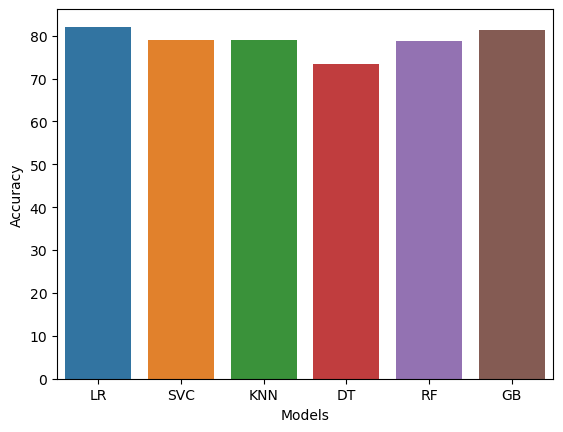

In [68]:
sns.barplot(data=final_data, x="Models", y="Accuracy")

In [69]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X, Y)

LogisticRegression(class_weight='balanced')

In [70]:
import joblib

In [71]:
joblib.dump(lr, 'prediction.pkl')
print('Model Saved Successfully in parent directory')

Model Saved Successfully in parent directory


In [83]:
hello = pd.DataFrame({
    'CGPA':7.5,
    'Internships':1,
    'Projects':1,
    'Workshops/Certifications':1,
    'Aptitude TestScore':65,
    'SoftSkillsRating':4.4,
    'ExtracurricularActivities':0,
    'PlacementTraining':0,
    'HSC_Marks':79
},index=[0])

In [84]:
hello

,CGPA,Internships,Projects,Workshops/Certifications,Aptitude TestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,HSC_Marks
0,8.9,0,3,2,90,4.0,1,1,82


In [85]:
model = joblib.load('prediction.pkl')

In [86]:
p = model.predict(hello)

In [87]:
list(p)

[1]